In [1]:
import numpy as np
from matplotlib import pyplot as plt
import copy

In [2]:
def sigmoid(z):
    g = 1.0/(1.0+np.exp(-z))   
    return g

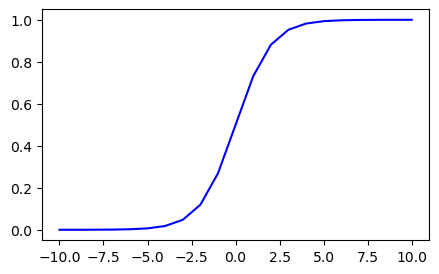

In [3]:
z_tmp = np.arange(-10,11)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

In [4]:
def compute_cost(x, y, w): 
    m = x.shape[0] 
    
    cost = 0.0
    for i in range(m): 
        f_wb = w * x[i]  
        cost += (f_wb - y[i]) ** 2  
    cost = cost/(2*m)

    return cost

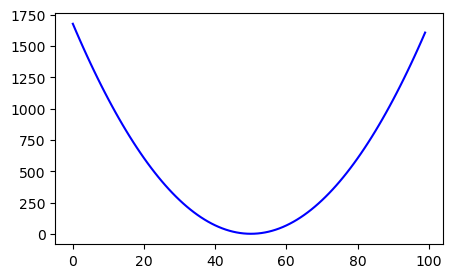

In [5]:
x = np.arange(-10, 10)
y = np.random.randint(2, size=20)
w = np.arange(-10, 10, 0.2)

J = np.zeros(w.shape[0])
for i in range(w.shape[0]):
    J[i] = compute_cost(x, y, w[i])

fig2, ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(J,  c="b")

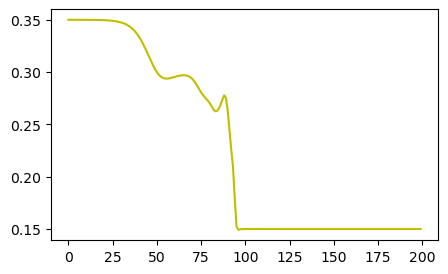

In [6]:
def compute_cost_logistic(x_, y_, w, b):
    m = x_.shape[0]

    cost_ = 0.0
    for i in range(m):
        z_i = w*x_[i]+b
        f_wb_i = sigmoid(z_i)
        cost_ += (f_wb_i - y_[i]) ** 2
    cost_ = cost_ / (2 * m)

    return cost_

x = np.random.randint(10, size=20)
y = np.random.randint(2, size=20)
w = np.arange(-20, 20, 0.2)
b= 10

cost = np.zeros(w.shape[0])
for i in range(w.shape[0]): 
    cost[i] = compute_cost_logistic(x, y, w[i], b)

fig3, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(cost, c="y")


<Figure size 640x480 with 0 Axes>

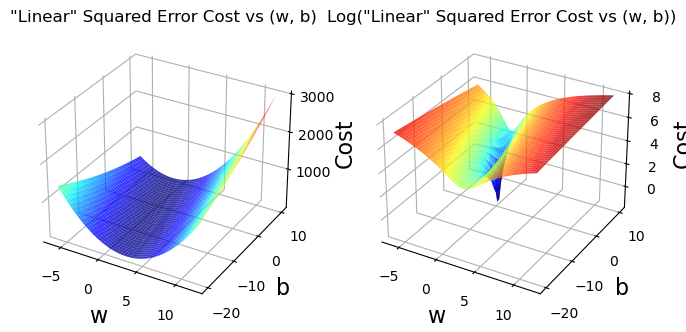

In [7]:
from matplotlib import cm

def compute_cost_logistic(x_, y_, w, b):
    m = x_.shape[0]

    cost_ = 0.0
    for i in range(m):
        z_i = w*x_[i]+b
        f_wb_i = z_i
        cost_ += (f_wb_i - y_[i]) ** 2
    cost_ = cost_ / (2 * m)

    return cost_

x = np.random.randint(10, size=20)
y = np.random.randint(2, size=20)
w, b = np.meshgrid(np.linspace(-6,12,50), np.linspace(10, -20, 40))
points = np.c_[w.ravel(), b.ravel()]


cost = np.zeros(points.shape[0])
for i in range(points.shape[0]): 
    w_i, x_i = points[i]
    cost[i] = compute_cost_logistic(x, y, w_i, x_i)
cost = cost.reshape(w.shape)

fig = plt.figure()
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(121,projection='3d')
ax.plot_surface(w, b, cost, alpha=0.8, cmap=cm.jet)
ax.set_xlabel('w', fontsize=16)
ax.set_ylabel('b', fontsize=16)
ax.set_zlabel("Cost", rotation=90, fontsize=16)
ax.set_title('"Linear" Squared Error Cost vs (w, b)')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax = fig.add_subplot(122,projection='3d')
ax.plot_surface(w, b, np.log(cost), alpha=0.8, cmap=cm.jet)
ax.set_xlabel('w', fontsize=16)
ax.set_ylabel('b', fontsize=16)
ax.set_zlabel("Cost", rotation=90, fontsize=16)
ax.set_title('Log("Linear" Squared Error Cost vs (w, b))')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

<Figure size 640x480 with 0 Axes>

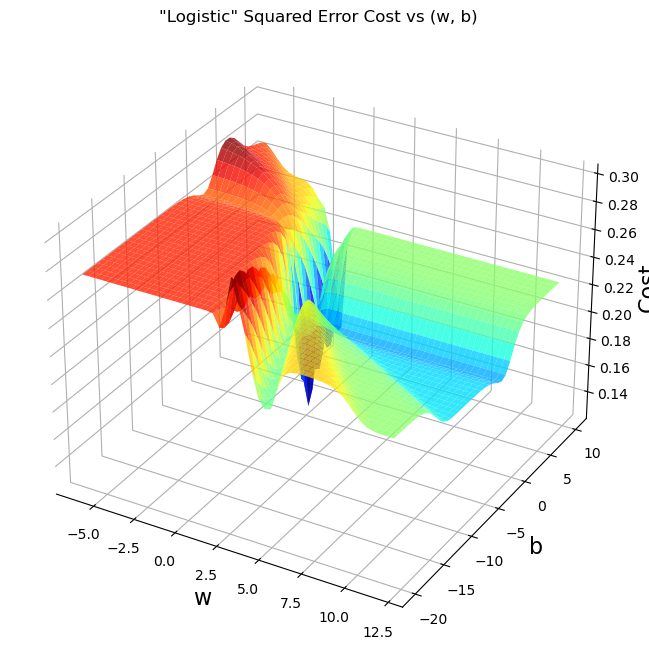

In [8]:
from matplotlib import cm

def compute_cost_logistic(x_, y_, w, b):
    m = x_.shape[0]

    cost_ = 0.0
    for i in range(m):
        z_i = w*x_[i]+b
        f_wb_i = sigmoid(z_i)
        cost_ += (f_wb_i - y_[i]) ** 2
    cost_ = cost_ / (2 * m)

    return cost_

x = np.random.randint(10, size=20)
y = np.random.randint(2, size=20)
w, b = np.meshgrid(np.linspace(-6,12,50), np.linspace(10, -20, 40))
points = np.c_[w.ravel(), b.ravel()]


cost = np.zeros(points.shape[0])
for i in range(points.shape[0]): 
    w_i, x_i = points[i]
    cost[i] = compute_cost_logistic(x, y, w_i, x_i)
cost = cost.reshape(w.shape)

fig = plt.figure()
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
# ax = fig.add_subplot(1, 1, 1, projection='3d')
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(w, b, cost, alpha=0.8, cmap=cm.jet)
ax.set_xlabel('w', fontsize=16)
ax.set_ylabel('b', fontsize=16)
ax.set_zlabel("Cost", rotation=90, fontsize=16)
ax.set_title('"Logistic" Squared Error Cost vs (w, b)')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


<Figure size 640x480 with 0 Axes>

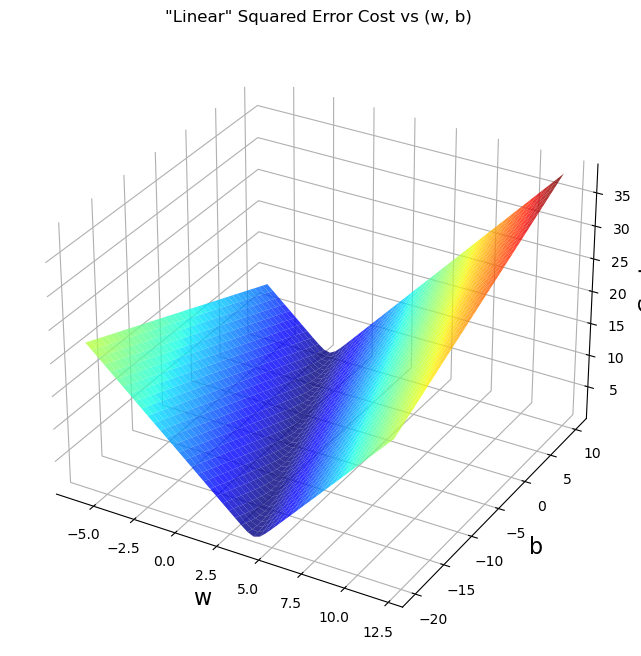

In [9]:
from matplotlib import cm

def log_1pexp(x, maximum=20):
    ''' approximate log(1+exp^x)
        https://stats.stackexchange.com/questions/475589/numerical-computation-of-cross-entropy-in-practice
    Args:
    x   : (ndarray Shape (n,1) or (n,)  input
    out : (ndarray Shape matches x      output ~= np.log(1+exp(x))
    '''

    out  = np.zeros_like(x,dtype=float)
    i    = x <= maximum
    ni   = np.logical_not(i)

    out[i]  = np.log(1 + np.exp(x[i]))
    out[ni] = x[ni]
    return out

def compute_new_cost_logistic(x_, y_, w, b):
    m = x_.shape[0]

    # cost_ = 0.0
    # for i in range(m):
    #     f = sigmoid(w*x_[i]+b)
    #     cost_ += (y_[i] * np.log(f)) if y_[i] == 1 else ( (1-y[i]) * (1-np.log(1-f)) )
    #     cost_ += (y_[i] * np.log(f)) + ( (1-y[i]) * (1-np.log(1-f)) )
    # cost_ = (-1)*(cost_ / m)
    
    for i in range(m):
        z = x_[i] * w + b
        cost = -(y * z) + log_1pexp(z)
        cost = np.sum(cost)/m  

    return cost

x = np.random.randint(10, size=20)
y = np.random.randint(2, size=20)
w, b = np.meshgrid(np.linspace(-6,12,50), np.linspace(10, -20, 40))
points = np.c_[w.ravel(), b.ravel()]

cost = np.zeros(points.shape[0])
for i in range(points.shape[0]): 
    w_i, x_i = points[i]
    cost[i] = compute_new_cost_logistic(x, y, w_i, x_i)
cost = cost.reshape(w.shape)

fig = plt.figure()
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(w, b, cost, alpha=0.8, cmap=cm.jet)
ax.set_xlabel('w', fontsize=16)
ax.set_ylabel('b', fontsize=16)
ax.set_zlabel("Cost", rotation=90, fontsize=16)
ax.set_title('"Linear" Squared Error Cost vs (w, b)')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


# Gradient Descent: 